In [3]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("Data/AF/airForceShots.csv").reset_index()
data.dropna(inplace=True)

In [5]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities.to_csv("Shots/AFOrigins.csv",index=False)

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

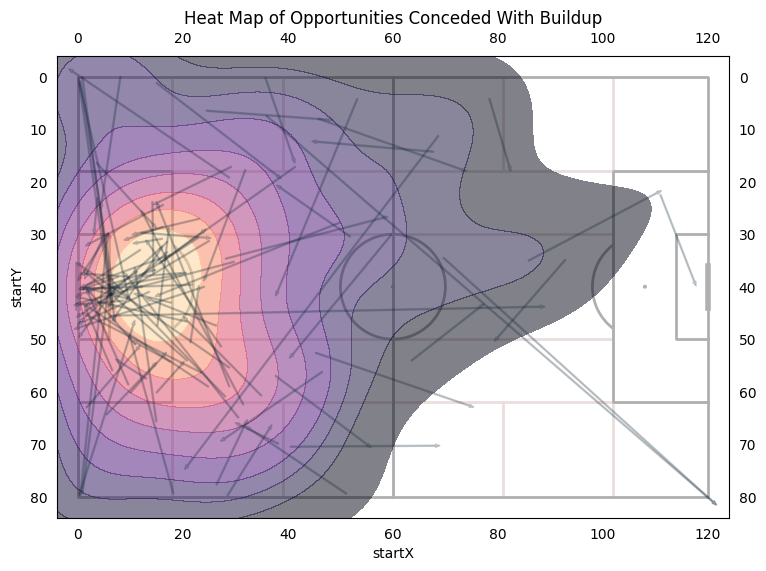

In [6]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [7]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [8]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side
0,1,Western Michigan,0.0,Tackle,Successful,"[28.09523809523808, 34.66666666666667]","[58.19047619047618, 26.85714285714286]",Opponent,Enter a player,28.095238,34.666667,58.190476,26.857143,left
3,7,Western Michigan,1.0,Pass,Unsuccessful,"[63.52380952380951, 54.095238095238095]","[76.66666666666666, 43.80952380952381]",Opponent,Enter a player,63.523810,54.095238,76.666667,43.809524,left
6,13,Western Michigan,2.0,Pass,Unsuccessful,"[24.476190476190467, 6.476190476190482]","[47.7142857142857, 8.19047619047619]",Opponent,Enter a player,24.476190,6.476190,47.714286,8.190476,left
9,19,Western Michigan,3.0,Tackle,Successful,"[85.23809523809521, 49.523809523809526]","[-1, -1]",AF,Enter a player,34.761905,30.476190,121.000000,81.000000,right
11,23,Western Michigan,4.0,Throw-in,Successful,"[68.85714285714283, 0.5714285714285694]","[87.33333333333331, 12.952380952380949]",AF,Enter a player,51.142857,79.428571,32.666667,67.047619,right
14,29,Western Michigan,5.0,Pass,Unsuccessful,"[74.76190476190476, 27.42857142857143]","[45.42857142857141, 17.33333333333333]",Opponent,Enter a player,45.238095,52.571429,74.571429,62.666667,right
17,35,Western Michigan,6.0,Set Piece,Successful,"[119.7142857142857, 78.85714285714286]","[110.38095238095238, 38.095238095238095]",AF,Enter a player,0.285714,1.142857,9.619048,41.904762,right
19,38,Michigan St,7.0,Set Piece,Unsuccessful,"[31.52380952380951, 62.476190476190474]","[12.476190476190467, 26.285714285714292]",AF,Enter a player,31.523810,62.476190,12.476190,26.285714,left
22,44,Michigan St,8.0,Tackle,Successful,"[75.7142857142857, 46.666666666666664]","[-1, -1]",AF,Enter a player,44.285714,33.333333,121.000000,81.000000,right
25,50,Michigan St,9.0,Pass,Unsuccessful,"[91.14285714285714, 20.95238095238095]","[104.66666666666666, 55.23809523809524]",Opponent,Enter a player,28.857143,59.047619,15.333333,24.761905,right


Text(0.5, 1.0, 'Opponent Shots Origin')

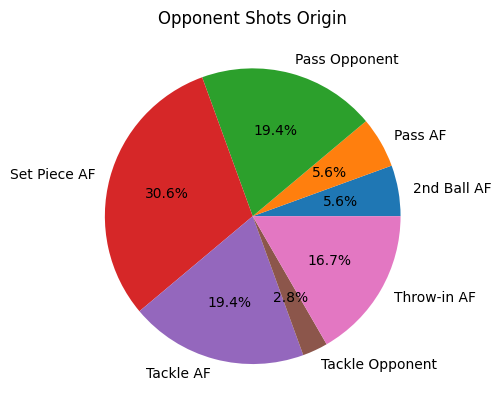

In [9]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

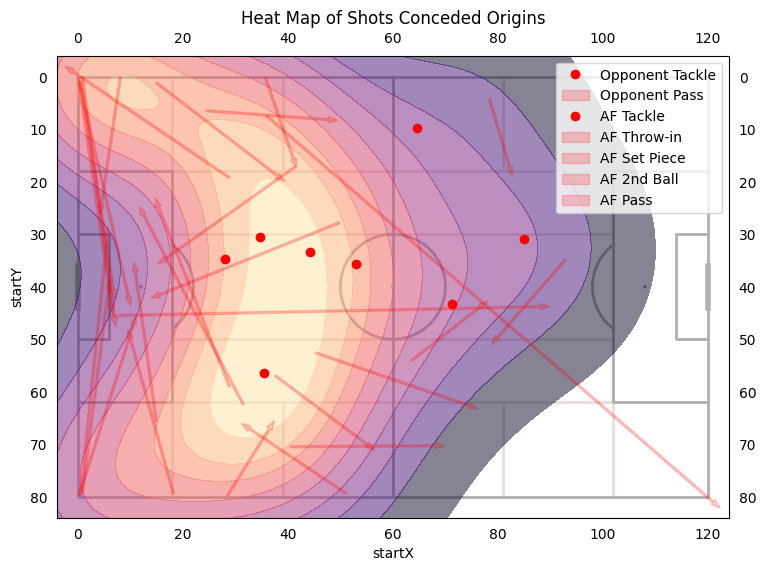

In [10]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


38

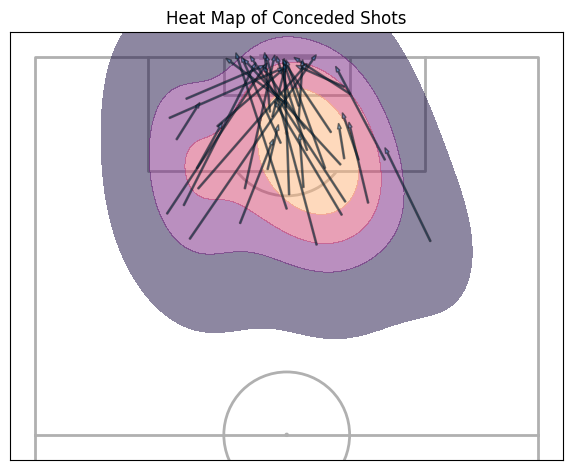

In [11]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Conceded Shots")
shots.shape[0]

In [12]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
0,0.0,Western Michigan,AF,Pass,Successful,3.523810,16.380952,14.380952,28.190476,Unsuccessful
1,1.0,Western Michigan,AF,Pass,Successful,51.904762,30.476190,38.571429,21.142857,Unsuccessful
2,2.0,Western Michigan,AF,Pass,Successful,31.904762,17.714286,24.285714,38.095238,Unsuccessful
3,3.0,Western Michigan,AF,Tackle,Successful,34.761905,30.476190,121.000000,81.000000,Unsuccessful
4,4.0,Western Michigan,AF,Pass,Successful,38.190476,69.904762,30.761905,66.285714,Unsuccessful
5,5.0,Western Michigan,AF,Pass,Successful,5.428571,64.380952,14.380952,55.047619,Unsuccessful
6,6.0,Western Michigan,AF,Set Piece,Successful,0.285714,1.142857,9.619048,41.904762,Successful
7,7.0,Michigan St,Opponent,Tackle,Successful,12.095238,29.714286,24.476190,30.666667,Unsuccessful
8,8.0,Michigan St,AF,Pass,Successful,1.619048,63.047619,11.333333,51.809524,Unsuccessful
9,9.0,Michigan St,AF,Pass,Successful,14.190476,23.809524,14.380952,36.761905,Successful


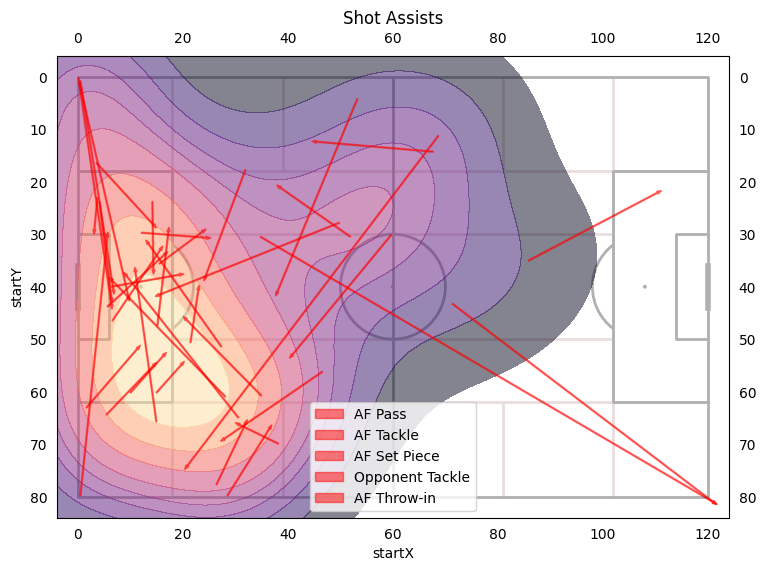

In [13]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    # if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
    #     if row.get("Event")=="Tackle":
    #          shape = 'o'
    #     else:
    #          shape = 'v'
    #     if team == "UCSD":
    #         color = "b"
    #     else:
    #         color = "r"
    #     plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
    #     continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

ValueError: 'label' must be of length 'x'

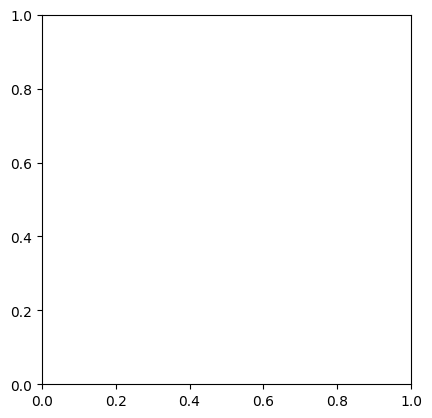

In [14]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("Game"),labels=["Lipscomb Pass","UCSD Tackle","Lipscomb Tackle"],autopct='%1.1f%%')
plt.title("Shot Assists")